# HW1 - part 1

In [122]:
import sys, random,binascii,AES,jupyter_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Markdown, display,HTML
%matplotlib inline 
plt.rcParams['figure.dpi'] = 150


We would like to test these principles when operating AES in different situations Note that for the purpose of the exercise, we will allow ourselves a number of mitigating assumptions which will be detailed below

To do this, take the following text which was published today on the BBC website
 


In [84]:
with open("plaintext.txt","r") as f:
    plaintext = f.read()
print("Total Length:",len(plaintext))
display(Markdown(f'\n"**_{plaintext}_**"'))


Total Length: 1167



"**_From the Pope to Greta Thunberg, there are growing calls for the crime of "ecocide" to be recognised in international criminal law - but could such a law ever work?
In December 2019, at the International Criminal Court in the Hague, Vanuatu's ambassador to the European Union made a radical suggestion: make the destruction of the environment a crime.
Vanuatu is a small island state in the South Pacific, a nation severely threatened by rising sea levels. Climate change is an imminent and existential crisis in the country, yet the actions that have caused rising temperatures - such as burning fossil fuels - have almost entirely taken place elsewhere, to serve other nations, with the blessing of state governments. 
Small island states like Vanuatu have long tried to persuade large powerful nations to voluntarily reduce their emissions, but change has been slow - so ambassador John Licht suggested that it might be time to change the law itself. An amendment to a treaty known as the Rome Statute, which established the International Criminal Court, could criminalise acts that amount to ecocide, he said, arguing "this radical idea merits serious discussion"_**"

And we will try to encrypt the message, using an encryption key **"R is a Short key"**
 

In [85]:
key = "R is a Short key"
key = key.encode().hex()
print(f"'R is a Short key':\n 0x{key}")
aes_lib = AES.AES(int(key,base=16))

'R is a Short key':
 0x5220697320612053686f7274206b6579


## Part One
1. Create a letter scatter histogram for each source message. Note that the message is divided into 16-letter blocks (aka STATE). The sotogram will collect the over the various statistics across the entire run (i.e. amount for the entire message)
2. We watched the article using AES, and after each round of AES and for the encrypted message at the end. Calculate the scatter plot of the letters throughout the entire message, some in the first section
3. Create one table that summarizes all the data and adds the average and standard deviation to each row

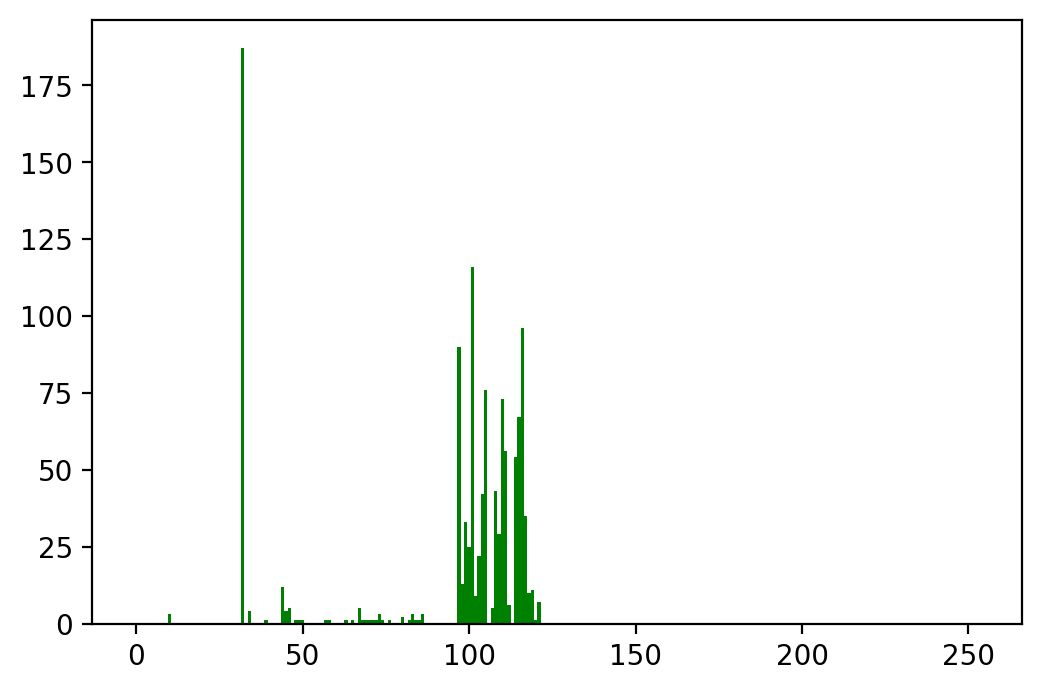

In [63]:
plaintext_binary = list(plaintext.encode())
plaintext_freq =  {i : plaintext_binary.count(i) for i in range(0,254)}
plt.bar( plaintext_freq.keys(), plaintext_freq.values(), 1.0, color='g')
plt.show()

In [148]:
import binascii
spec_enc_text = [""]*10

for i in range(0, len(plaintext), 16):  
    ciper = aes_lib.encrypt_by_stage(int(plaintext[i:i+16].encode().hex(),base=16))
    for j,c in enumerate(ciper):
        spec_enc_text[j] += ('{:x}'.format(c)).zfill(32)


In [149]:
cipertext_freq = []
for s in spec_enc_text:
    val = {i :  list(bytes.fromhex(s)).count(i) for i in range(0,254)}
    cipertext_freq.append(val)
    #plt.bar( val.keys(), val.values(), 1.0, color='g')
    #plt.show()

In [162]:
columns=[]
final_freq = [plaintext_freq]  + cipertext_freq
histo_result = np.zeros((len(final_freq)+1,34))

for row,s in enumerate(final_freq):
    current_values = list(s.values())
    for col in range(0,254,8):
        histo_result[row][col//8] = sum(current_values[col:col+8])
    histo_result[row][-1] = np.std(current_values)
    histo_result[row][-2] = np.mean(current_values)

pd.DataFrame(histo_result, columns=[f"{col}-{col+7}" for col in range(0,254,8)]+["STD","MEAN"])


,0-7,8-15,16-23,24-31,32-39,40-47,48-55,56-63,64-71,72-79,...,192-199,200-207,208-215,216-223,224-231,232-239,240-247,248-255,STD,MEAN
0,0.0,3.0,0.0,0.0,192.0,21.0,3.0,3.0,10.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.598425,18.902885
1,41.0,32.0,34.0,26.0,39.0,35.0,47.0,36.0,35.0,28.0,...,38.0,29.0,41.0,27.0,31.0,33.0,38.0,29.0,4.562992,2.122705
2,37.0,31.0,30.0,43.0,29.0,34.0,25.0,31.0,37.0,38.0,...,41.0,40.0,43.0,29.0,45.0,35.0,52.0,23.0,4.578740,2.138810
3,45.0,48.0,33.0,31.0,34.0,27.0,43.0,46.0,26.0,38.0,...,33.0,50.0,40.0,41.0,35.0,23.0,42.0,32.0,4.578740,2.211214
4,46.0,41.0,28.0,40.0,51.0,39.0,37.0,37.0,29.0,28.0,...,39.0,40.0,24.0,45.0,38.0,47.0,35.0,29.0,4.570866,2.193606
5,27.0,50.0,30.0,31.0,39.0,30.0,40.0,38.0,47.0,40.0,...,26.0,37.0,26.0,46.0,44.0,34.0,30.0,27.0,4.570866,2.243297
6,42.0,40.0,40.0,43.0,26.0,25.0,37.0,43.0,33.0,36.0,...,40.0,35.0,37.0,39.0,34.0,34.0,33.0,24.0,4.574803,2.207788
7,38.0,36.0,33.0,37.0,38.0,31.0,49.0,27.0,40.0,38.0,...,49.0,44.0,31.0,38.0,41.0,44.0,44.0,21.0,4.570866,2.193606
8,39.0,47.0,37.0,38.0,43.0,44.0,38.0,35.0,34.0,32.0,...,33.0,37.0,30.0,38.0,36.0,41.0,35.0,31.0,4.555118,2.087390
9,31.0,38.0,34.0,45.0,37.0,45.0,32.0,45.0,39.0,39.0,...,40.0,34.0,38.0,29.0,36.0,32.0,33.0,23.0,4.574803,1.917674
